# Python & Data Science

In [6]:
# Import the libraries
import pandas as pd # Python Data Analysis Library
import numpy as np # Math tools

import matplotlib.pyplot as plt # Plotting library

# Tells matplotlib to return the graph to the notebook
%matplotlib inline 

 # HD plots
%config InlineBackend.figure_format = 'retina'

## Series
One-dimensional ndarray with axis labels (including time series).

In [7]:
# The Series object (basically a list with a lot of additional methods)
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## DataFrame
Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

In [8]:
# The DataFrame object
df = pd.DataFrame(np.random.rand(50,4), columns=['a','b','c','d'])
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

## Stats

In [9]:
# Super simple stats
df.describe()

,a,b,c,d
count,50.000000,50.000000,50.000000,50.000000
mean,0.453434,0.474079,0.495910,0.489471
std,0.294339,0.264024,0.279939,0.296390
min,0.013134,0.011399,0.052163,0.018662
25%,0.175697,0.264660,0.289264,0.210095
50%,0.437910,0.440339,0.501940,0.458875
75%,0.731727,0.689618,0.677343,0.767874
max,0.975233,0.998673,0.996692,0.984752


In [10]:
# Column data types
df.dtypes

a    float64
b    float64
c    float64
d    float64
dtype: object

In [11]:
# Head
df.head()

,a,b,c,d
0,0.074391,0.292615,0.493891,0.790926
1,0.748799,0.436612,0.692136,0.157959
2,0.013134,0.011399,0.116663,0.984752
3,0.425807,0.236270,0.052163,0.798057
4,0.202729,0.061115,0.507717,0.018662


In [12]:
# Sample
df.sample(2)

,a,b,c,d
2,0.013134,0.011399,0.116663,0.984752
48,0.393176,0.612950,0.341424,0.428947


## Manipulating the DataFrame
NOTE: Compared to Spark, Pandas is NOT lazy (beware of data size!)

In [13]:
df.memory_usage()

Index     72
a        400
b        400
c        400
d        400
dtype: int64

In [14]:
# By default, operation as NOT performed in place
print df.sort_values(by='a').head(5)
print df.head(5)

# Solutions: inplace=True or assignment

           a         b         c         d
2   0.013134  0.011399  0.116663  0.984752
43  0.016462  0.358940  0.056025  0.177214
7   0.036516  0.998673  0.469346  0.083620
8   0.037105  0.701169  0.996692  0.197068
0   0.074391  0.292615  0.493891  0.790926
          a         b         c         d
0  0.074391  0.292615  0.493891  0.790926
1  0.748799  0.436612  0.692136  0.157959
2  0.013134  0.011399  0.116663  0.984752
3  0.425807  0.236270  0.052163  0.798057
4  0.202729  0.061115  0.507717  0.018662


In [15]:
# Accessing element Row 0, columns 'a'
# using .loc method
df.loc[0,'a']

## .loc < select element(s) via labels
## .iloc < select element(s) via position ( df.loc[0,'a'] == df.iloc[0,0] )

0.074390970658981481

In [16]:
# Dates!
dates = pd.date_range('20170101', periods=14)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# Lets create an other DataFrame
df1 = pd.DataFrame(np.random.randn(14,4), index=dates, columns=list('ABCD'))
df1.sample(5)

,A,B,C,D
2017-01-05,0.116702,-0.057272,-0.565203,0.892160
2017-01-01,-0.221077,-0.553551,-1.060819,1.885797
2017-01-07,0.759856,-1.041574,-0.492863,-1.617727
2017-01-02,1.782890,-1.062609,0.497422,-0.961645
2017-01-08,0.712742,-0.290077,0.097110,0.026069


In [18]:
# Slices (id est, between dates)
df1.loc['20170102':'20170104',['A','B']]

,A,B
2017-01-02,1.782890,-1.062609
2017-01-03,1.345087,-1.024965
2017-01-04,-0.362836,0.117766


In [19]:
# Filtering
df1[df1.A > 1]

,A,B,C,D
2017-01-02,1.782890,-1.062609,0.497422,-0.961645
2017-01-03,1.345087,-1.024965,0.711096,-0.333721


## Lambda functions (Apply)

In [20]:
df.apply(lambda x: x.max() - x.min())

a    0.962099
b    0.987274
c    0.944529
d    0.966090
dtype: float64

## Join

In [21]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [22]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [23]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Group by

In [24]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.364230,0.815627
1,bar,one,-1.005342,0.187195
2,foo,two,-0.539986,1.613801
3,bar,three,-1.329210,-1.738959
4,foo,two,-0.537025,-0.667198
5,bar,two,-1.554557,0.557456
6,foo,one,-1.019011,-0.196212
7,foo,three,0.039676,-1.516207


In [25]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.889110,-0.994309
foo,-1.692117,0.049811


In [26]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.005342  0.187195
    three -1.329210 -1.738959
    two   -1.554557  0.557456
foo one   -0.654781  0.619415
    three  0.039676 -1.516207
    two   -1.077011  0.946603

## Categorical encoding
One-hot encoding as seen in previous lecture

In [27]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [28]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


## Categorical
Process categorical attributes

In [29]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [30]:
# Convert the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [31]:
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

In [32]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [33]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [34]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting
Simple plotting example of a time series. We will see more in the next notebook (EDA for Iris)

In [35]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts

2000-01-01    -1.759774
2000-01-02    -2.450786
2000-01-03    -0.945881
2000-01-04    -1.856885
2000-01-05    -2.200138
2000-01-06    -3.806408
2000-01-07    -2.034015
2000-01-08    -2.710323
2000-01-09    -2.304586
2000-01-10    -0.963226
2000-01-11    -1.713444
2000-01-12    -2.438832
2000-01-13    -3.143636
2000-01-14    -3.954387
2000-01-15    -4.399097
2000-01-16    -3.820290
2000-01-17    -2.737759
2000-01-18    -4.167415
2000-01-19    -4.118757
2000-01-20    -5.510196
2000-01-21    -3.729351
2000-01-22    -3.326728
2000-01-23    -3.490092
2000-01-24    -4.452718
2000-01-25    -4.956932
2000-01-26    -4.697087
2000-01-27    -5.853879
2000-01-28    -7.322806
2000-01-29    -6.454345
2000-01-30    -7.146329
                ...    
2002-08-28    18.755831
2002-08-29    19.763986
2002-08-30    17.814952
2002-08-31    16.859723
2002-09-01    17.898004
2002-09-02    17.976055
2002-09-03    17.753338
2002-09-04    18.679244
2002-09-05    18.752648
2002-09-06    17.992895
2002-09-07    18

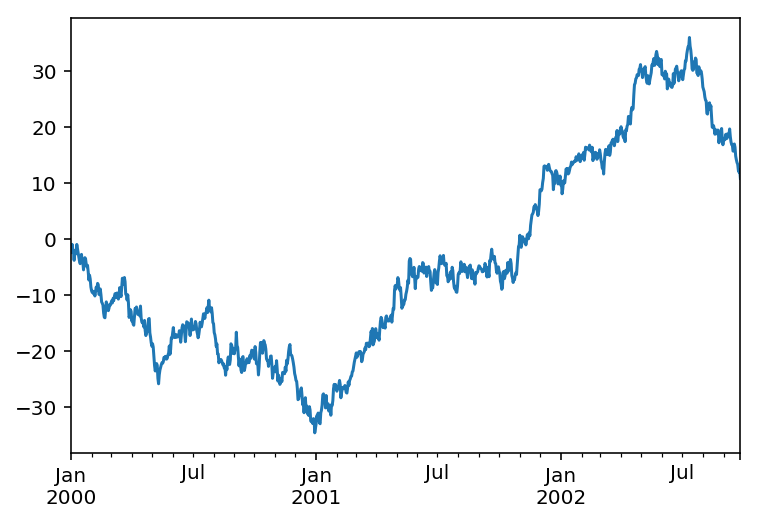

In [36]:
ts.plot()

## I/O
Load and save data

In [37]:
# Save DF to CSV
df.to_csv('foo.csv')

In [39]:
# Load from CSV
pd.read_csv('foo.csv')

# (NOTE: CSV is a very simple file type. To prevent Pandas from writing its own index
# use the index=False parameter when saving)

,Unnamed: 0,id,raw_grade,grade
0,0,1,a,very good
1,1,2,b,good
2,2,3,b,good
3,3,4,a,very good
4,4,5,a,very good
5,5,6,e,very bad


In [40]:
# Want to read/write an Excel? Just change method
df.to_excel('foo.xls')
pd.read_excel('foo.xls')

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad
